In [1]:
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt 

In [2]:
def mjd_to_orbital_phase(mjd):
    """this converts mjd to orbital phase"""
    # coefficients from the quadratic ephemeris
    T0 = 43076.32            # reference MJD
    P = 16.57794             # orbital period (days)
    P_dot = -4.01e-5    # quadratic coefficient (change in period)

    # quadratic coefficients for ax^2 + bx + c = 0
    a = P_dot
    b = P
    c = T0 - mjd

    # solve for N
    discriminant = b**2 - 4*a*c
    #if discriminant < 0:
     #   raise ValueError("No real solution for cycle number N.")

    N1 = (-b + np.sqrt(discriminant)) / (2*a)
    N2 = (-b - np.sqrt(discriminant)) / (2*a)
    bpos = N1 > 0
    N = np.copy(N2)
    N[bpos] = N1[bpos]
    # choose the solution that makes sense
    #N = N1 if N1 > 0 else N2

    # compute orbital phase
    phase = N % 1  # fractional part of N
    return phase, N  # return N

In [3]:
# Convert
mjd_example = 62000
phase, cycle = mjd_to_orbital_phase(mjd_example)
print(f"MJD: {mjd_example}, Cycle: {cycle:.4f}, Orbital Phase: {phase:.4f}")

MJD: 62000, Cycle: 1144.6670, Orbital Phase: 0.6670


In [5]:
mjds_start, mjds_end, flux, error = np.loadtxt("X-1.Ch.T.H._2.0-6.0keV_gsclc.dat",unpack=True)
phases_start, cycles = mjd_to_orbital_phase(mjds_start)
phases_end, cycles = mjd_to_orbital_phase(mjds_end)

print(phases_start)
print(phases_end)

[0.67187509 0.71864377 0.75363334 ... 0.77368467 0.83232974 0.89490496]
[0.68011039 0.75010774 0.80843817 ... 0.82859261 0.89116923 0.94983264]


In [ ]:
help(mjd_to_orbital_phase)

## Plot, experiment, save output file including mjd, flux, phases

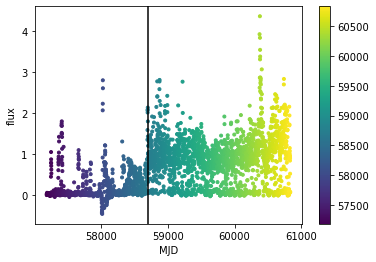

In [30]:
plt.figure(figsize=(6,4))
#plt.plot(mjds_start, flux, "-",color = 'palevioletred')
plt.scatter(mjds_start, flux, c=mjds_start, s=9, zorder=5)
plt.colorbar()
#plt.plot(mjds_end, flux, "-",color = 'palevioletred')
plt.xlabel("MJD")
plt.ylabel("flux")

# create a time divider
tmid = 58700.
dum = plt.axvline(tmid, zorder=25, color='k')

# select points based on this
blate = mjds_start > tmid

Text(0, 0.5, 'flux')

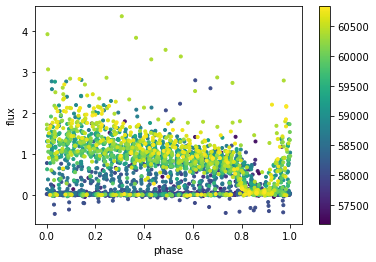

In [21]:
plt.figure(figsize=(6,4))
plt.scatter(phases_start, flux, c=mjds_start, s=9)
# plt.plot(phases_end, flux, "o",color = 'pink', markersize = '3')
plt.colorbar()
plt.xlabel("phase")
plt.ylabel("flux")

Text(0.5, 1.0, 'Datapoints with MJD > 58700.00')

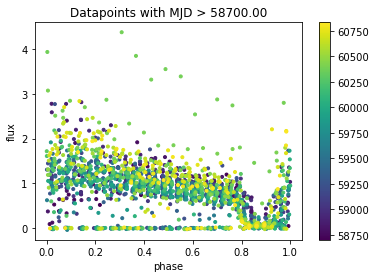

In [37]:
# let's now look only at the "late" datapoints
plt.figure(figsize=(6,4))
plt.scatter(phases_start[blate], flux[blate], c=mjds_start[blate], s=9)
# plt.plot(phases_end, flux, "o",color = 'pink', markersize = '3')
plt.colorbar()
plt.xlabel("phase")
plt.ylabel("flux")
plt.title('Datapoints with MJD > %.2f' % (tmid))


Text(0.5, 1.0, 'Datapoints with MJD > 58700.00, no "stripe"')

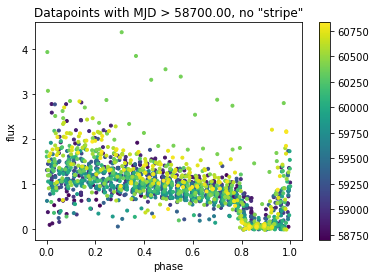

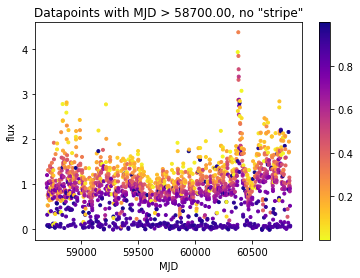

In [50]:
# curious - what happens if we select only the dips we "want", knowing ahead of time
# where they are in phase?
bdiscard = (phases_start < 0.79) & (flux < 0.05)

bkeep = (blate) & (~bdiscard)

# let's see what happens when we discard that stripe...

plt.figure(figsize=(6,4))
plt.scatter(phases_start[bkeep], flux[bkeep], c=mjds_start[bkeep], s=9)
# plt.plot(phases_end, flux, "o",color = 'pink', markersize = '3')
plt.colorbar()
plt.xlabel("phase")
plt.ylabel("flux")
plt.title('Datapoints with MJD > %.2f, no "stripe"' % (tmid))

# let's view the time-series
plt.figure(figsize=(6,4))
#plt.plot(mjds_start, flux, "-",color = 'palevioletred')
plt.scatter(mjds_start[bkeep], flux[bkeep], c=phases_start[bkeep], s=9, zorder=5, \
           cmap='plasma_r')
plt.colorbar()
#plt.plot(mjds_end, flux, "-",color = 'palevioletred')
plt.xlabel("MJD")
plt.ylabel("flux")
plt.title('Datapoints with MJD > %.2f, no "stripe"' % (tmid))
#plt.xlim(59700,59900)
#plt.ylim(0,2)

In [10]:
# save this to disk
a_out = np.column_stack((mjds_start, mjds_end, flux, error, phases_start, phases_end))

In [14]:
np.savetxt('cirx1_maxi_2-6keV_phases.dat',a_out)

In [16]:
!wc cirx1_maxi_2-6keV_phases.dat

    3123   18738  468694 cirx1_maxi_2-6keV_phases.dat
